In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
# Example Load Data
from load_data import load_homeless_demographic

In [4]:
# Example Load Categorical Data
from load_data import load_time_series_data

time_series_data,afforable_started,afforable_completed,total_started,total_completed,total_started,total_completed,timed_waiting_list_size,timed_median_afforability_ratio,timed_lower_quatile_afforability_ratio = load_time_series_data()

In [3]:
# Example Load Time Series Data
from load_data import load_categorical_data

categorical_data,prevention_duty_owed,relief_duty_owed,no_longer_homeless,homeless_real_value,categorical_waiting_list_size,social_housing_lettings_2021,band_A_B_properties,band_C_D_properties,band_E_F_properties,band_G_H_properties,count_median_price_houses,count_median_earning_gross,categorical_median_afforability_ratio,count_lower_quatile_price_houses,count_lower_quatile_earning_gross,categorical_lower_quatile_afforability_ratio = load_categorical_data()

In [ ]:
# Things below are not important team-wise

In [4]:
hl_demographic = load_homeless_demographic()

In [5]:
hl_demographic

,Code,Area_name,"Total initial assessments1,2",Total owed a prevention or relief duty,Threatened with homelessness within 56 days - \nPrevention duty owed,due to service of valid Section 21 Notice3,Homeless - \nRelief duty owed4,Not homeless nor threatened with homelessness within 56 days - no duty owed,Number of households\n in area4 (000s),Households assessed as threatened with homelessness\nper (000s),Households assessed as homeless\nper (000s)
0,E07000223,Adur,53,52,17,1,35,1,28.32,0.600282,1.235876
1,E07000026,Allerdale,122,119,34,0,85,3,44.034,0.772131,1.930327
2,E07000032,Amber Valley,90,89,62,8,27,1,56.923,1.089191,0.474325
3,E07000224,Arun,204,183,105,27,78,21,73.188,1.434661,1.065748
4,E07000170,Ashfield,75,74,30,9,44,1,56.941,0.526861,0.77273
...,...,...,...,...,...,...,...,...,...,...,...
304,E07000229,Worthing,125,119,43,13,76,6,50.619,0.849483,1.501413
305,E07000238,Wychavon,99,97,31,9,66,2,56.49,0.54877,1.168348
306,E07000128,Wyre,101,97,80,2,17,4,50.392,1.587554,0.337355
307,E07000239,Wyre Forest,121,118,57,1,61,3,46.217,1.233312,1.319861


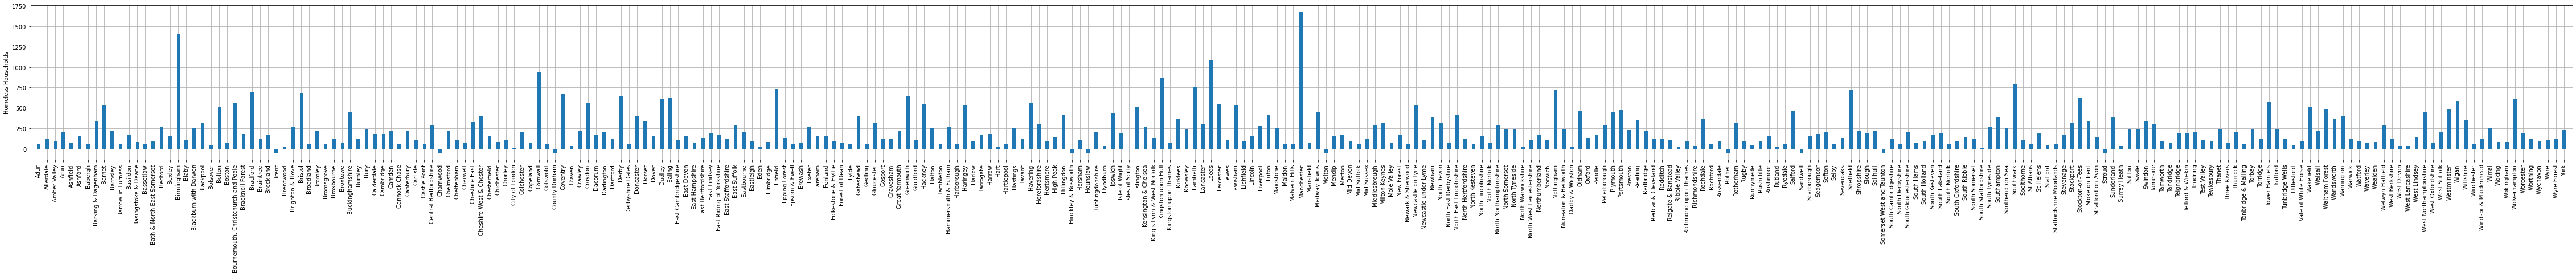

In [6]:
# Un-sorted figure

total_homeless = list(hl_demographic.iloc[:,2])
labels = list(hl_demographic.iloc[:,1])
y_pos = np.arange(0,2*len(total_homeless),2)

fig, ax = plt.subplots(figsize=(80,5))
ax.grid(zorder=0)
plt.bar(y_pos, total_homeless, align='center', width=0.9, zorder=3)
plt.xticks(y_pos, labels)
plt.ylabel('Homeless Households')
figure = plt.gcf()
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.xlim([-2,max(y_pos)+2])
plt.savefig('Figure/un_sorted_total_homeless_households.png')
plt.show()

In [8]:
outlier_rows = hl_demographic.loc[hl_demographic.loc[:,'Total initial assessments1,2']<0].index
total_homeless_record = np.array(hl_demographic.drop(labels=outlier_rows, axis=0).iloc[:,2])

The IQR Maximum: 587.0
The Q3: 287.0
The Mean: 227.1571906354515
The Median: 158.0
The Q1: 87.0
The IQR Minimum: 0
Number of Outliers on the Right: 20


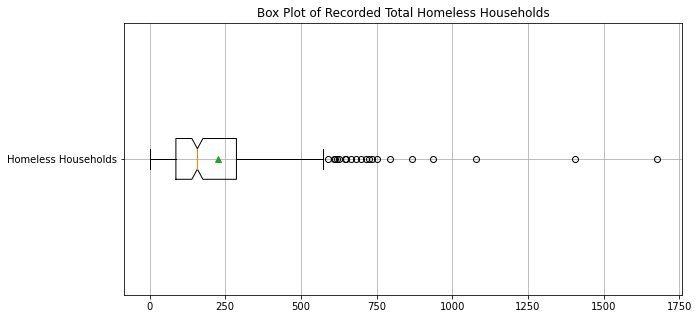

In [14]:
fig_box, ax_box = plt.subplots(figsize=(10,5))
ax_box.grid(zorder=0)
ax_box.set_title('Box Plot of Recorded Total Homeless Households')
ax_box.boxplot(total_homeless_record,showmeans=True, vert=False,notch=True,zorder=2)
ax_box.set_yticklabels(['Homeless Households'])
plt.savefig('Figure/recorded_total_homeless_households_box.png')

Q3, Q1 = np.percentile(total_homeless_record, [75 ,25])
IQR = Q3-Q1
Q_max = Q3+1.5*IQR

print('The IQR Maximum: '+str(Q_max))
print('The Q3: '+str(Q3))
print('The Mean: '+str(np.mean(total_homeless_record)))
print('The Median: '+str(np.median(total_homeless_record)))
print('The Q1: '+str(Q1))
print('The IQR Minimum: '+str(0))
print('Number of Outliers on the Right: '+str(len(total_homeless_record[total_homeless_record>Q_max])))



In [16]:
with open('C:/Users/Liu2286/Documents/GitHub/ADS_year3_project_8/ResultTables/homeless_demographic_analysis.xlsx', 'w') as f:
    # create the csv writer
    writer = csv.writer(f)
    # write a row to the csv file
    writer.writerow(['The IQR Maximum',Q_max])
    writer.writerow(['The Q3',Q3])
    writer.writerow(['The Mean',np.mean(total_homeless_record)])
    writer.writerow(['The Median',np.median(total_homeless_record)])
    writer.writerow(['The Q1',Q1])
    writer.writerow(['The IQR Minimum',0])
    writer.writerow(['Number of Outliers on the Right',len(total_homeless_record[total_homeless_record>Q_max])])
    f.close()

In [162]:
total_homeless_ordered = dict(zip(labels, total_homeless))
total_homeless_ordered = dict(sorted(total_homeless_1.items(), key=lambda item: item[1],reverse=True))

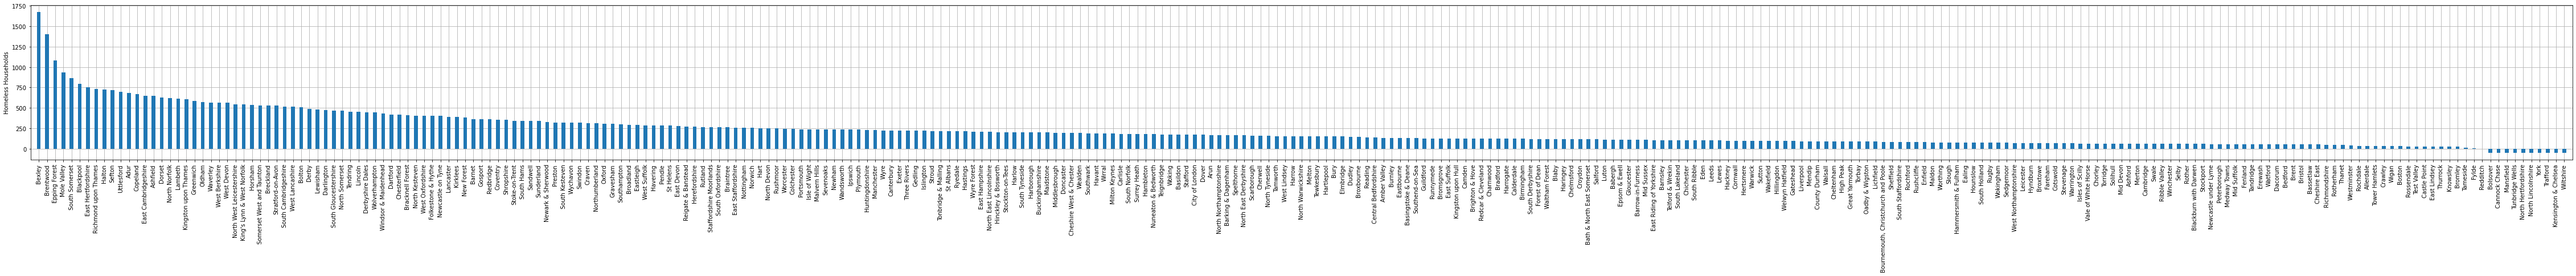

In [164]:
sorted_hl_pop = list(total_homeless_ordered.values())
labels = list(total_homeless_ordered.keys())
y_pos = np.arange(0,2*len(sorted_hl_pop),2)

fig, ax = plt.subplots(figsize=(80,5))
ax.grid(zorder=0)
plt.bar(y_pos, sorted_hl_pop, align='center', width=0.9, zorder=3)
plt.xticks(y_pos, labels)
plt.ylabel('Homeless Households')
figure = plt.gcf()
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.xlim([-2,max(y_pos)+2])
plt.savefig('Figure/sorted_total_homeless_households.png')
plt.show()